In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [4]:
DIR="../robot-data/new_data"

SCENARIO="build" 
# SCENARIO="cans"
FAILURE="laser_fault" 
# FAILURE="obs"
INF=0
SUP=200

In [5]:
runs = []
for x in range(100):
    try:
        runs.append(np.genfromtxt(f"{DIR}/normal/{SCENARIO}/counts_only/counts_normal_{SCENARIO}{x+1}.csv", 
                                  delimiter=",", skip_header=1))
    except:
        pass
all_runs = np.concatenate([np.reshape(r, -1) for r in runs])

(0.0, 200.0)

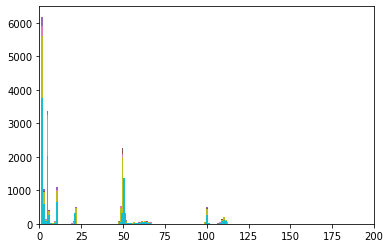

In [11]:
for i, r in enumerate(runs):
    plt.hist(np.reshape(r[np.logical_and(r>INF, r<SUP)], -1), bins=100)
plt.xlim((INF,SUP))

In [8]:
faults = []
for x in range(100):
    try:
        faults.append(np.genfromtxt(f"{DIR}/test/{FAILURE}/{SCENARIO}/counts_only/counts_{FAILURE}_{SCENARIO}{x+1}.csv", 
                                  delimiter=",", skip_header=1))
    except:
        pass
# all_faults = np.concatenate([np.reshape(r, -1) for r in faults])

(0.0, 200.0)

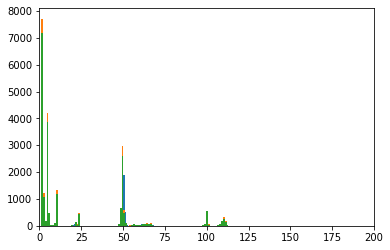

In [12]:
for i, f in enumerate(faults):
    plt.hist(np.reshape(f[np.logical_and(f>INF, f<SUP)], -1), bins=100)
plt.xlim((INF, SUP))

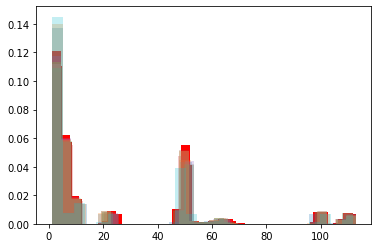

In [13]:
for i, r in enumerate(faults):
    f = faults[i]
    plt.hist(np.reshape(f[np.logical_and(f>INF, f<SUP)], -1), bins='auto', color='red', density=True)
    
for i, r in enumerate(runs):
    r = runs[i]
    plt.hist(np.reshape(r[np.logical_and(r>INF, r<SUP)], -1), bins='auto',  alpha=0.25, density=True)


In [14]:
ks_runs = []
for j, rj in enumerate(runs):
    ks_runs.append(ks_2samp(np.reshape(all_runs, -1), np.reshape(rj, -1)).statistic)
ks_faults = []
for j, fj in enumerate(faults):
    ks_faults.append(ks_2samp(np.reshape(all_runs, -1), np.reshape(fj, -1)).statistic)

(array([698.37296621, 698.37296621, 698.37296621]),
 array([0.00971543, 0.01019273, 0.01067003, 0.01114733]),
 <BarContainer object of 3 artists>)

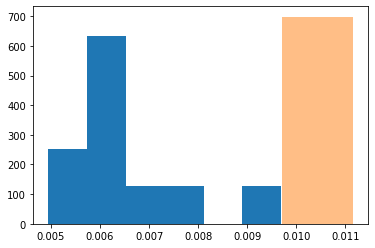

In [19]:
plt.hist(ks_runs, bins="auto", density=True)
plt.hist(ks_faults, bins="auto", density=True, alpha=0.5)